In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


#1. Exploratory Data Analysis (EDA)

In [4]:
category = df['Category'].value_counts().reset_index()
category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


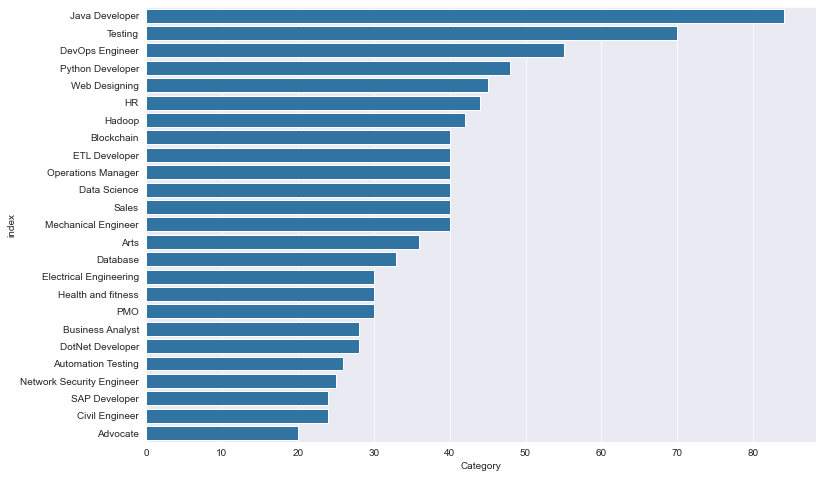

In [5]:
plt.figure(figsize=(12,8))
sns.barplot(x=category['Category'], y=category['index'])
plt.show()

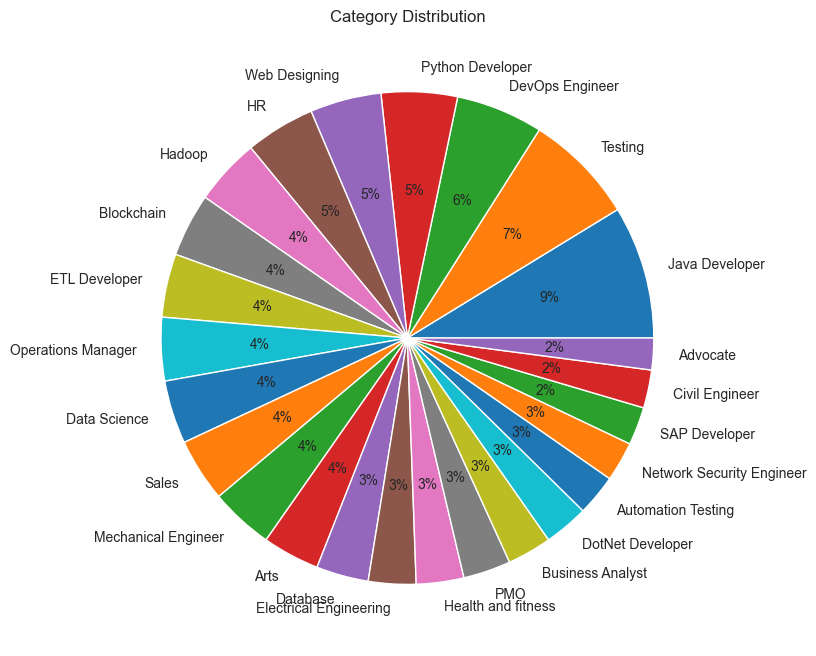

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(category['Category'], labels=category['index'],
         autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

#2. Data Pre-processing:
1. Data Cleaning
2. Data Encoding

In [6]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText) 
    resumeText = re.sub('RT|cc', ' ', resumeText)  
    resumeText = re.sub('#\S+', '', resumeText)  
    resumeText = re.sub('@\S+', '  ', resumeText) 
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText) 
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText) 
    return resumeText

In [7]:
df['cleaned'] = df['Resume'].apply(lambda x:cleanResume(x))
df.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [8]:
#getting the entire resume text
corpus=" "
for i in range(0,len(df)):
    corpus= corpus+ df["cleaned"][i]

In [9]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

In [10]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

411913

In [11]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
words[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [12]:
# Now encode the data
label = LabelEncoder()
df['new_Category'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,cleaned,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


In [13]:
unique = df[['Category', 'new_Category']].drop_duplicates()
unique

,Category,new_Category
0,Data Science,6
40,HR,12
84,Advocate,0
104,Arts,1
140,Web Designing,24
185,Mechanical Engineer,16
225,Sales,22
265,Health and fitness,14
295,Civil Engineer,5
319,Java Developer,15


In [16]:
result_dict = df.set_index('new_Category')['Category'].to_dict()
result_dict

{6: 'Data Science',
 12: 'HR',
 0: 'Advocate',
 1: 'Arts',
 24: 'Web Designing',
 16: 'Mechanical Engineer',
 22: 'Sales',
 14: 'Health and fitness',
 5: 'Civil Engineer',
 15: 'Java Developer',
 4: 'Business Analyst',
 21: 'SAP Developer',
 2: 'Automation Testing',
 11: 'Electrical Engineering',
 18: 'Operations Manager',
 20: 'Python Developer',
 8: 'DevOps Engineer',
 17: 'Network Security Engineer',
 19: 'PMO',
 7: 'Database',
 13: 'Hadoop',
 10: 'ETL Developer',
 9: 'DotNet Developer',
 3: 'Blockchain',
 23: 'Testing'}

In [ ]:
# Vectorizing the cleaned columns
text = df['cleaned'].values
target = df['new_Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

In [ ]:
text

array(['Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerati

In [ ]:
WordFeatures.shape

(962, 1500)

# 3: Train Test Data and Modeling

In [ ]:
# Separate train and test data
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((769, 1500), (193, 1500), (769,), (193,))

In [ ]:
# Model Training
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [ ]:
# Prediction
y_pred = model.predict(X_test)

In [ ]:
print(f'---------------------------------\n| Training Accuracy   :- {(model.score(X_train, y_train)*100).round(2)}% |')
print(f'---------------------------------\n| Validation Accuracy :- {(model.score(X_test, y_test)*100).round(2)}% |\n---------------------------------')

---------------------------------
| Training Accuracy   :- 98.96% |
---------------------------------
| Validation Accuracy :- 96.89% |
---------------------------------


In [ ]:
print(metrics.classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

In [ ]:
to_predict = ["ABHISHEK ANAND Undergraduate Student Currently pursuing B.Tech in CSE from IIIT Kottayam. abhishekanand20bcs111@iiitkottayam.ac.in +91 7700892006 Gaya, India EDUCATION Bachelor of Technology Indian Institute of InformationTechnology, Kottayam 12/2020 - Present,  6.7 Computer Science andEngineering Intermediate Chinmaya Vidyalaya, Bokaro Steel City 05/2017 - 05/2019,  96% Physics, Chemistryand Mathematics PERSONAL PROJECTS Movie Recommender System Content based Recommender System in Jypter https://github.com/a-anand1703/Movie_Recommender Restaurant Review Analysis Sentiment Analysis of Reviews using Natural LanguageProcessing https://github.com/a-anand1703/Resturant_reviews Suduko Solver It can solve any suduko by reading from txt file or input asmatrix C++ https://github.com/a-anand1703/Suduko-Solver Churn Rate Prediction Predict the churn rate of employees using Artificial NeuralNetwork https://github.com/a-anand1703/churn-rate-prediction Libray Management System Management System using Python and MYSQL https://github.com/a-anand1703/Library-Management-System SKILLS Machine Learning Data Analytics Data Structures Deep Learning Natural Language Processing Object Oriented Programming Algorithm MYSQL Computer networks Self- confident Hardworking Problem Solver LINKS GitHub https://github.com/a-anand1703 Leetcode https://leetcode.com/aanand01703/ Kaggle https://www.kaggle.com/aanand1703 LinkedIn https://www.linkedin.com/in/abhishek-anand-27a603217/ LANGUAGES C/C++ Full Professional Proficiency Python Full Professional Proficiency HTML Full Professional Proficiency CSS Full Professional Proficiency Javascript Limited Working Proficiency INTERESTS Solving Mathematics Problems Powerlifting Sketching Courses Courses "]

In [ ]:
vectorised = word_vectorizer.transform(to_predict)
prediction = model.predict(vectorised)
prediction

array([6])

In [ ]:
import joblib

model_filename = "resume_classification.pkl"
joblib.dump(model, model_filename)

vectorizer_filename = "word_vectorizer.pkl"
joblib.dump(word_vectorizer, vectorizer_filename)


['word_vectorizer.pkl']

In [ ]:
import joblib
word_vectorizer = joblib.load("word_vectorizer.pkl")
model = joblib.load("resume_classification.pkl")

to_predict = ["ABHISHEK ANAND Undergraduate Student Currently pursuing B.Tech in CSE from IIIT Kottayam. abhishekanand20bcs111@iiitkottayam.ac.in +91 7700892006 Gaya, India EDUCATION Bachelor of Technology Indian Institute of InformationTechnology, Kottayam 12/2020 - Present,  6.7 Computer Science andEngineering Intermediate Chinmaya Vidyalaya, Bokaro Steel City 05/2017 - 05/2019,  96% Physics, Chemistryand Mathematics PERSONAL PROJECTS Movie Recommender System Content based Recommender System in Jypter https://github.com/a-anand1703/Movie_Recommender Restaurant Review Analysis Sentiment Analysis of Reviews using Natural LanguageProcessing https://github.com/a-anand1703/Resturant_reviews Suduko Solver It can solve any suduko by reading from txt file or input asmatrix C++ https://github.com/a-anand1703/Suduko-Solver Churn Rate Prediction Predict the churn rate of employees using Artificial NeuralNetwork https://github.com/a-anand1703/churn-rate-prediction Libray Management System Management System using Python and MYSQL https://github.com/a-anand1703/Library-Management-System SKILLS Machine Learning Data Analytics Data Structures Deep Learning Natural Language Processing Object Oriented Programming Algorithm MYSQL Computer networks Self- confident Hardworking Problem Solver LINKS GitHub https://github.com/a-anand1703 Leetcode https://leetcode.com/aanand01703/ Kaggle https://www.kaggle.com/aanand1703 LinkedIn https://www.linkedin.com/in/abhishek-anand-27a603217/ LANGUAGES C/C++ Full Professional Proficiency Python Full Professional Proficiency HTML Full Professional Proficiency CSS Full Professional Proficiency Javascript Limited Working Proficiency INTERESTS Solving Mathematics Problems Powerlifting Sketching Courses Courses "]
vectorised = word_vectorizer.transform(to_predict)
y_prob = model.predict_proba(vectorised)

top_n = 2
top_predictions = []

for probs in y_prob:
    top_indices = probs.argsort()[-top_n:][::-1] 
    top_preds = [model.classes_[idx] for idx in top_indices]  
    top_predictions.append(top_preds)

c:\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.2.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 1.2.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.2.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please ref

In [ ]:
top_predictions

[[6, 24]]

In [ ]:
top_probabilities

[[1.0, 0.0]]